Given an image, you want to output a simplified version.

Thresholding is the process of setting pixels with intensity greater than some
value to be white and less than the value to be black. A more advanced technique
is adaptive thresholding, where the threshold value for a pixel is determined by
the pixel intensities of its neighbors. This can be helpful when lighting
conditions change over different regions in an image:

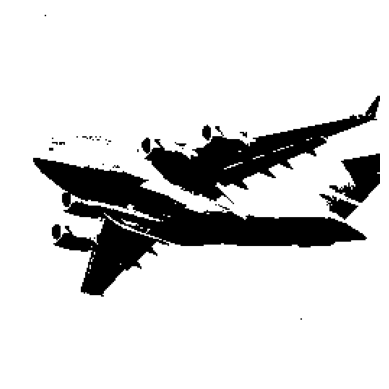

In [5]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
image_grey = cv2.imread("../sim_data/images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,max_output_value,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,neighborhood_size,subtract_from_mean)
# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()


Our solution has four important arguments in adaptiveThreshold.
max_output_value simply determines the maximum intensity of the output
pixel intensities. cv2.ADAPTIVE_THRESH_GAUSSIAN_C sets a pixel’s threshold to be a weighted sum of the neighboring pixel intensities. The weights are
determined by a Gaussian window. Alternatively we could set the threshold to
simply the mean of the neighboring pixels with cv2.ADAPTIVE_THRESH_MEAN_C

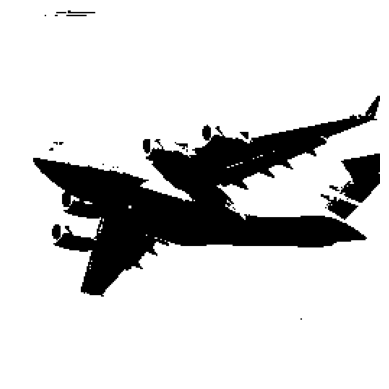

In [6]:
# Apply cv2.ADAPTIVE_THRESH_MEAN_C
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
max_output_value,
cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY,
neighborhood_size,
subtract_from_mean)
# Show image
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()


The last two parameters are the block size (the size of the neighborhood used to
determine a pixel’s threshold) and a constant subtracted from the calculated
threshold (used to manually fine-tune the threshold).
A major benefit of thresholding is denoising an image—keeping only the most
important elements. For example, thresholding is often applied to photos of
printed text to isolate the letters from the page